In [1]:
from z3 import *
from bool_test import QueryTest
from test_info import *
from utils import *
import json
import matplotlib.pyplot as plt
import time
import numpy as np


SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


In [10]:
# tests = ['tpc-h-test/WHERE/q2.json','tpc-h-test/WHERE/q5.json','tpc-h-test/WHERE/q7.json','tpc-h-test/WHERE/q8.json','tpc-h-test/WHERE/q19.json','tpc-h-test/WHERE/q21.json']
tests = ['tpc-h-test/WHERE/q2.json', 'tpc-h-test/WHERE/q3.json', 'tpc-h-test/WHERE/q5.json', 'tpc-h-test/WHERE/q6.json', 'tpc-h-test/WHERE/q7.json']
# tests = ['tpc-h-test/WHERE/q7.json']

ttg_time = []
fg_time = []

ttg_cost = []
fg_cost = []
gt_cost = []

test_obj = []


for t in tests:
    f = open(t)
    data = json.load(f)

    q1_info = QueryInfo(data['q1'])
    q2_info = QueryInfo(data['q2'])
    m = MappingInfo(q1_info, q2_info)
    t = QueryTest(q1_info, q2_info, m.z3_var_lookup, m.table_mappings[0], m.table_mappings_reverse[0])
    gt_cost.append((t.q1_comb_tree.get_size() + t.q2_comb_tree.get_size()) / 3 + data['ground truth']['cost'])
    
    
    start = time.time()
    t.test_where_having_min_overall_ttg()
    end = time.time()
    ttg_time.append(end - start)
    tree_sz = (t.q1_comb_tree.get_size() + t.q2_comb_tree.get_size()) / 6*len(t.rs_fix_pair_ttg) + sum([x[0][1] for x in t.rs_fix_pair_ttg]) + sum([x[1][1] for x in t.rs_fix_pair_ttg])
    ttg_cost.append(tree_sz + sum([x[1][1] for x in t.rs_fix_pair_ttg]))
    
    start = time.time()
    t.test_where_having_min_overall_fg()
    end = time.time()
    fg_time.append(end - start)
    tree_sz = (t.q1_comb_tree.get_size() + t.q2_comb_tree.get_size()) / 6*len(t.rs_fix_pair_fg) + sum([x[0][1] for x in t.rs_fix_pair_fg]) + sum([x[1][1] for x in t.rs_fix_pair_fg])
    fg_cost.append(tree_sz + sum([x[1][1] for x in t.rs_fix_pair_fg]))
    
    test_obj.append(t)

    


iter len:  45
# of necessary predicates: 8
# of repair sites: 2
# of necessary predicates: 8
# of repair sites: 2
# of necessary predicates: 8
# of repair sites: 2
# of necessary predicates: 8
# of repair sites: 1
Repair Site #0: part.p_size == 4
Repair Site size #0: 1
Fix #0: True
Fix Size #0: 1
Repair Site #1: region.r_name == "hello "
Repair Site size #1: 1
Fix #1: (part.p_size == 3 AND supplier.s_nationkey == nation.n_nationkey AND region.r_name == "hello")
Fix Size #1: 5
iter len:  45
Repair Site #0: part.p_size == 4
Repair Site size #0: 1
Fix #0: part.p_size == 3 AND supplier.s_nationkey == nation.n_nationkey AND region.r_name == "hello"
Fix Size #0: 5
Repair Site #1: region.r_name == "hello "
Repair Site size #1: 1
Fix #1: part.p_size == 3 AND supplier.s_nationkey == nation.n_nationkey AND region.r_name == "hello"
Fix Size #1: 5
iter len:  45
# of necessary predicates: 9
# of repair sites: 2
# of necessary predicates: 9
# of repair sites: 2
# of necessary predicates: 9
# of repa

In [26]:
print((t.q1_comb_tree.get_size() + t.q2_comb_tree.get_size())/6+data['ground truth']['cost'])
print(data['ground truth']['cost'])

10.0
8


[17.666666666666664, 13.333333333333334, 14.666666666666668, 9.0, 15.0] [25.666666666666664, 17.333333333333336, 18.666666666666668, 9.0, 30.0]
[75.21905708312988, 280.01254057884216, 260.4732336997986, 30.81003999710083, 229.1196255683899] [26.393083095550537, 12.907963752746582, 146.74467873573303, 14.740408182144165, 130.42741560935974]


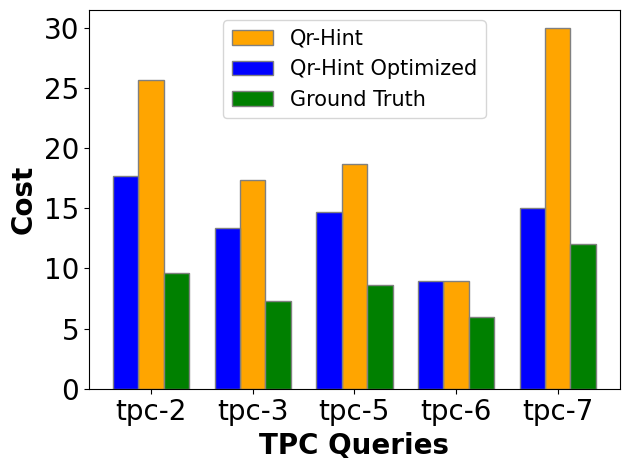

In [11]:
print(ttg_cost, fg_cost)
print(ttg_time, fg_time)

# ttg_cost.append(15.0)
# fg_cost.append(21.3333333)
# ttg_time.append(68)
# fg_time.append(55)
# fg_cost[2] = 26.333333

# gt_cost = [7.8333333333, 6.0, 13.833333333]

tpc_label = ['tpc-2', 'tpc-3', 'tpc-5', 'tpc-6', 'tpc-7']

barWidth = 0.25
br1 = np.arange(len(ttg_cost))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


plt.bar(br2, fg_cost, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint')
plt.bar(br1, ttg_cost, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint Optimized')
plt.bar(br3, gt_cost, color ='green', width = barWidth,
        edgecolor ='grey', label ='Ground Truth')



 
# Adding Xticks
plt.xlabel('TPC Queries', fontweight ='bold', fontsize = 20)
plt.ylabel('Cost', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth/1 for r in range(len(ttg_cost))],
        tpc_label, fontsize=20)
plt.yticks(fontsize=20)
 
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.savefig('cost_vs_query.png')
plt.show()

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

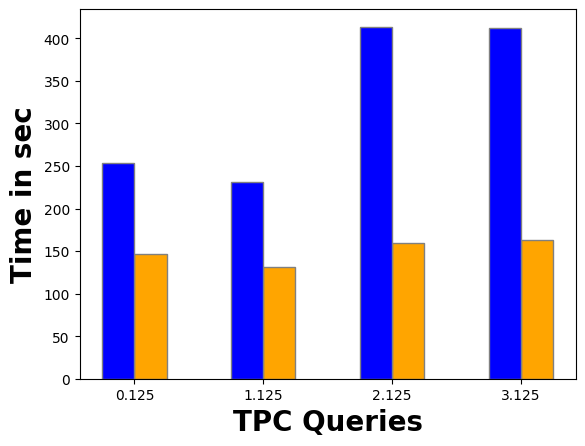

In [14]:
# tpc_label = ['tpc-2', 'tpc-3']
# ttg_time[2] = 160
# fg_time[2] = 96

label = ['1']

barWidth = 0.25
br1 = np.arange(len(ttg_cost))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br2, fg_time, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint')
plt.bar(br1, ttg_time, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint Optimized')


 
# Adding Xticks
plt.xlabel('TPC Queries', fontweight ='bold', fontsize = 20)
plt.ylabel('Time in sec', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth/2 for r in range(len(ttg_cost))],
        tpc_label, fontsize=20)
plt.yticks(fontsize=20)
 
plt.legend(prop={'size': 15})
plt.tight_layout()

plt.savefig('time_vs_query.png')
plt.show()

In [5]:
print(ttg_time)
print(fg_time)

print(ttg_cost)
print(fg_cost)
print(gt_cost)


[76.17920875549316, 288.533700466156, 272.04113817214966, 31.97579836845398, 235.7406313419342]
[27.318247079849243, 13.439101934432983, 152.84332847595215, 14.503982305526733, 127.55074286460876]
[14.916666666666666, 10.833333333333334, 11.166666666666668, 6.75, 12.0]
[22.916666666666664, 14.833333333333334, 15.166666666666668, 6.75, 27.0]
[9.666666666666666, 7.333333333333334, 8.666666666666668, 6.0, 12.0]


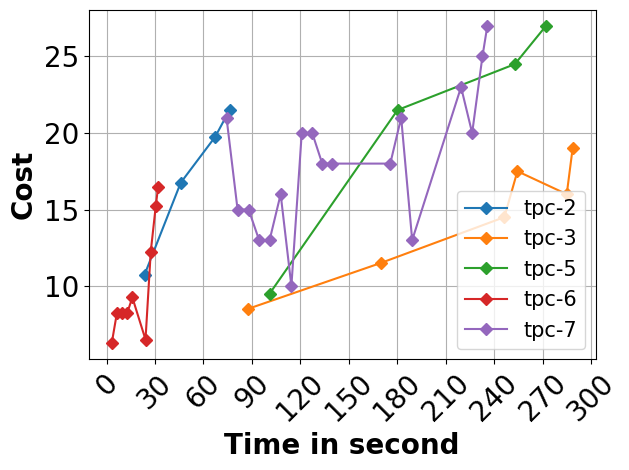

In [6]:
tpc_label = ['tpc-2', 'tpc-3', 'tpc-5', 'tpc-6', 'tpc-7']
for i, t in enumerate(test_obj):
    x = t.ttg_converge[0]
    y = t.ttg_converge[1]
    plt.plot(x,y, marker='D', label=tpc_label[i])
    

plt.grid()
plt.xlabel('Time in second', fontweight ='bold', fontsize = 20)
plt.ylabel('Cost', fontweight ='bold', fontsize = 20)
plt.xticks(np.arange(0, 301, 30.0), fontsize=20, rotation = 45)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.savefig('ttg_cost_vs_time.png')
plt.show()

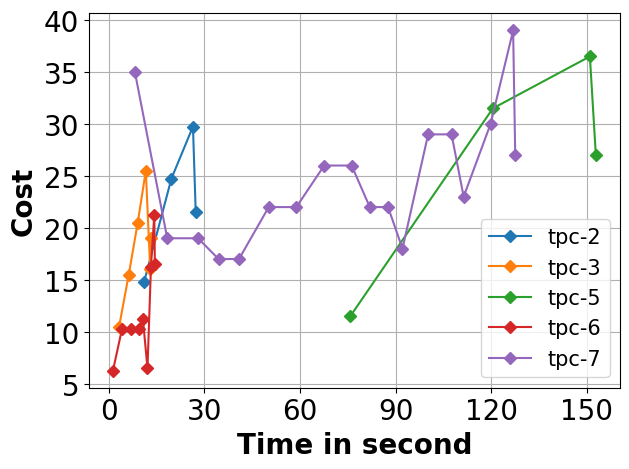

In [7]:
tpc_label = ['tpc-2', 'tpc-3', 'tpc-5', 'tpc-6', 'tpc-7']
for i, t in enumerate(test_obj):
    x = t.fg_converge[0]
    y = t.fg_converge[1]
    plt.plot(x,y, marker='D', label=tpc_label[i])

plt.grid()
plt.xlabel('Time in second', fontweight ='bold', fontsize = 20)
plt.ylabel('Cost', fontweight ='bold', fontsize = 20)
plt.xticks(np.arange(0, 180, 30.0), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.savefig('fg_cost_vs_time.png')
plt.show()

In [13]:
# tests = ['tpc-h-test/WHERE/q2.json', 'tpc-h-test/WHERE/q3.json', 'tpc-h-test/WHERE/q5.json', 'tpc-h-test/WHERE/q6.json', 'tpc-h-test/WHERE/q7.json']
tests = ['tpc-h-test/WHERE/q7_multiple.json']
num_mistakes = [1,2,4,5]

ttg_time = []
fg_time = []

ttg_cost = []
fg_cost = []
gt_cost = []

test_obj = []


for t in tests:
    f = open(t)
    data = json.load(f)
    
    for i in num_mistakes:
        case = 'case' + str(i)
        q1_info = QueryInfo(data['q1'])
        q2_info = QueryInfo(data[case]['q2'])
        m = MappingInfo(q1_info, q2_info)
        t = QueryTest(q1_info, q2_info, m.z3_var_lookup, m.table_mappings[0], m.table_mappings_reverse[0])
        gt_cost.append((t.q1_comb_tree.get_size() + t.q2_comb_tree.get_size()) / 3 + data[case]['ground truth']['cost'])
    
    
        start = time.time()
        t.test_where_having_min_overall_ttg()
        end = time.time()
        ttg_time.append(end - start)
        tree_sz = (t.q1_comb_tree.get_size() + t.q2_comb_tree.get_size()) / 6*len(t.rs_fix_pair_ttg) + sum([x[0][1] for x in t.rs_fix_pair_ttg]) + sum([x[1][1] for x in t.rs_fix_pair_ttg])
        ttg_cost.append(tree_sz + sum([x[1][1] for x in t.rs_fix_pair_ttg]))
    
        start = time.time()
        t.test_where_having_min_overall_fg()
        end = time.time()
        fg_time.append(end - start)
        tree_sz = (t.q1_comb_tree.get_size() + t.q2_comb_tree.get_size()) / 6*len(t.rs_fix_pair_fg) + sum([x[0][1] for x in t.rs_fix_pair_fg]) + sum([x[1][1] for x in t.rs_fix_pair_fg])
        fg_cost.append(tree_sz + sum([x[1][1] for x in t.rs_fix_pair_fg]))
    
    test_obj.append(t)

iter len:  66
# of necessary predicates: 9
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 9
# of repair sites: 1
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 9
# of repair sites: 1
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 2
# of necessary predicates: 7
# of repair sites: 1
Repair Site #0: customer.c_custkey != orders.o_custkey
Repair Site size #0: 1
Fix #0: 

In [25]:
print(ttg_time)
print(fg_time)

print(ttg_cost)
print(fg_cost)
print(gt_cost)


[252.98272681236267, 231.7023754119873, 413.5848128795624, 411.954487323761]
[146.01145887374878, 131.1955258846283, 159.5845503807068, 162.53606820106506]
[12, 15.0, 31.0, 31.0]
[12, 30.0, 47.0, 47.0]
[12.0, 12.0, 16.0, 18.0]


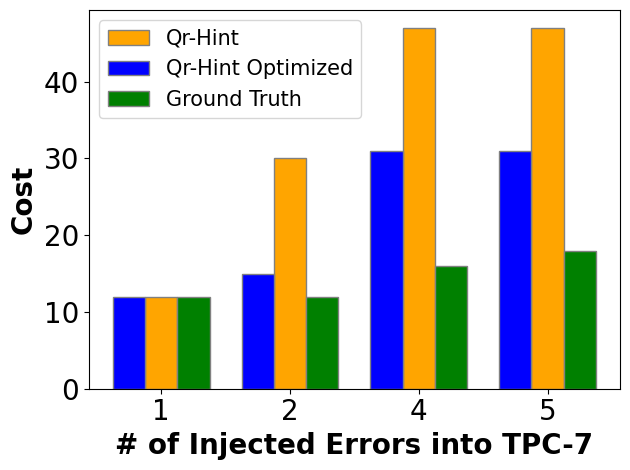

In [30]:
tpc_label = ['1', '2', '4', '5']

barWidth = 0.25
br1 = np.arange(len(ttg_cost))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


plt.bar(br2, fg_cost, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint')
plt.bar(br1, ttg_cost, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint Optimized')
plt.bar(br3, gt_cost, color ='green', width = barWidth,
        edgecolor ='grey', label ='Ground Truth')



 
# Adding Xticks
plt.xlabel('# of Injected Errors into TPC-7', fontweight ='bold', fontsize = 20)
plt.ylabel('Cost', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth/1 for r in range(len(ttg_cost))],
        tpc_label, fontsize=20)
plt.yticks(fontsize=20)
 
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.savefig('q7_cost_vs_query.png')
plt.show()

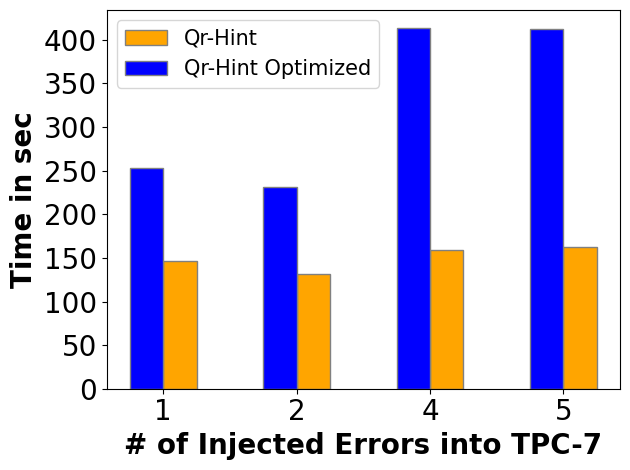

In [29]:
barWidth = 0.25
br1 = np.arange(len(ttg_cost))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br2, fg_time, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint')
plt.bar(br1, ttg_time, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint Optimized')


 
# Adding Xticks
plt.xlabel('# of Injected Errors into TPC-7', fontweight ='bold', fontsize = 20)
plt.ylabel('Time in sec', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth/2 for r in range(len(ttg_cost))],
        tpc_label, fontsize=20)
plt.yticks(fontsize=20)
 
plt.legend(prop={'size': 15})
plt.tight_layout()

plt.savefig('q7_time_vs_query.png')
plt.show()